In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import ArcGIS
import folium

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1',headers=headers).text

In [3]:
soup=BeautifulSoup(webpage,'lxml')

In [4]:
company=soup.find_all('div',class_='ab-company-result-card')
len(company)

30

In [5]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
old=[]
employees=[]
salary=[]

for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('p',class_='rating').text.strip())
    reviews.append(i.find('a',class_='review-count').text.strip())
    ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    employees.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    salary.append(i.find_all('span',class_='caption-subdued-large')[1].text.strip())

In [41]:
HQ=[]
latitude=[]
longitude=[]
for i in hq:
    HQ.append(i.split("+",1)[0])

nom=ArcGIS()
for i in HQ:
    s=nom.geocode(i)
    latitude.append(s.latitude)
    longitude.append(s.longitude)
map=folium.Map(location=[f['Latitude'].item(),f['Longitude'].item()])
map.add_child(folium.Marker(location=[f['Latitude'].item(),f['Longitude'].item()],popup='HQ',icon=folium.Icon(color='red')))

In [47]:
Average=[]
for i in salary:
    j=i.replace("k",".")
    Average.append(j.split(".",1)[0]+'000')
Average

['580000',
 '407000',
 '402000',
 '146000',
 '142000',
 '310000',
 '348000',
 '284000',
 '186000',
 '130000',
 '247000',
 '107000',
 '113000',
 '171000',
 '75000',
 '74000',
 '74000',
 '62000',
 '59000',
 '59000',
 '70000',
 '56000',
 '44000',
 '105000',
 '45000',
 '37000',
 '40000',
 '35000',
 '48000',
 '39000']

In [36]:
d={'name':name, 'rating':rating, 'reviews':reviews, 'type':ctype, 'hq':HQ, 'old':old, 'employees':employees, 'Average Salary':salary, 'Latitude':latitude, 'Longitude':longitude}
df=pd.DataFrame(d)
df

,name,rating,reviews,type,hq,old,employees,Average Salary,Latitude,Longitude
0,TCS,3.9,(49.3k Reviews),Public,"Mumbai,Maharashtra",54 years old,1 Lakh+ Employees (India),580.5k,18.94017,72.83489
1,Accenture,4.1,(32.2k Reviews),Public,Dublin,33 years old,1 Lakh+ Employees (India),407k,53.34807,-6.24827
2,Cognizant,3.9,(29.4k Reviews),Private,Teaneck. New Jersey.,28 years old,1 Lakh+ Employees (India),402.3k,40.88723,-74.01916
3,ICICI Bank,4.0,(34.7k Reviews),Public,"Mumbai,Maharashtra",28 years old,1 Lakh+ Employees (India),146.9k,18.94017,72.83489
4,HDFC Bank,4.0,(39.6k Reviews),Public,"Mumbai,Maharashtra",28 years old,1 Lakh+ Employees (India),142.2k,18.94017,72.83489
5,Wipro,3.9,(28.5k Reviews),Public,"Bangalore/Bengaluru,Karnataka",77 years old,1 Lakh+ Employees (India),310.6k,12.96618,77.58690
6,Infosys,3.9,(28k Reviews),Public,"Bengaluru/Bangalore,Karnataka",41 years old,1 Lakh+ Employees (India),348.1k,12.96618,77.58690
7,Capgemini,3.9,(23.9k Reviews),Public,Paris,55 years old,1 Lakh+ Employees (India),284.7k,48.85717,2.34140
8,Tech Mahindra,3.7,(21.7k Reviews),Public,"Pune,Maharashtra",36 years old,50k-1 Lakh Employees (India),186.5k,18.50421,73.85286
9,Genpact,4.0,(20.9k Reviews),Public,"New York,New York",25 years old,50k-1 Lakh Employees (India),130.5k,40.71455,-74.00714


In [40]:
f=df.loc[df['name']=='Accenture']
print(f['rating'].item())
location=[f['Latitude'].item(),f['Longitude'].item()]
location

4.1


[53.348070000000064, -6.248269999999934]

In [54]:
int(round(float(f['rating'].item()),0))

4

In [9]:
import matplotlib.pyplot as plt


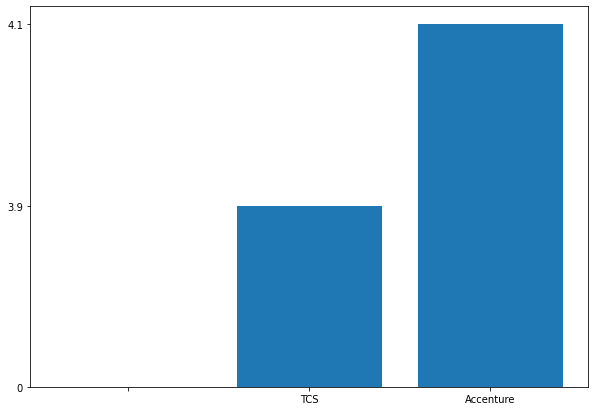

In [10]:
f=df.loc[df['name']=='Accenture']
d=df.loc[df['name']=='TCS']
x={'':'0','TCS':d['rating'].item(),'Accenture':f['rating'].item()}
w=list(x.keys())
y=list(x.values())
fig = plt.figure(figsize =(10, 7))
plt.bar(w,y)
plt.show()

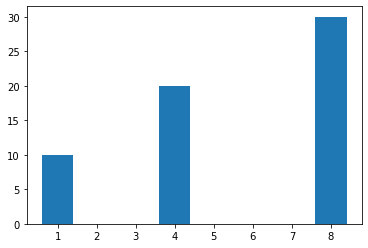

In [11]:
xdata = [1, 4, 8]
ydata = [10, 20, 30]
plt.bar(xdata, ydata)
plt.ylim(ymin=0)  # this line
plt.show()

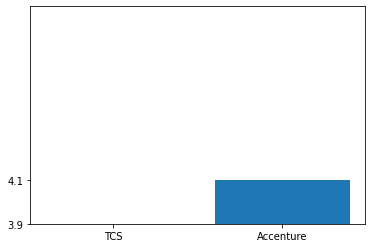

In [39]:
f=df.loc[df['name']=='Accenture']
d=df.loc[df['name']=='TCS']
x={'TCS':d['rating'].item(),'Accenture':f['rating'].item()}
w=list(x.keys())
y=list(x.values())
fig, ax = plt.subplots()
ax.bar(w,y)
ax.set(ylim=(0, 5))
plt.show()

In [13]:
for i in soup.find_all('span',class_='caption-subdued-large')[1]

SyntaxError: invalid syntax (Temp/ipykernel_11376/901587446.py, line 1)

In [ ]:
company[0].find_all('span',class_='caption-subdued-large')[1].text.strip()

In [14]:
nom=ArcGIS()

In [29]:
s=nom.geocode(HQ[0])
s

Location(Mumbai, Maharashtra, (18.940170000000023, 72.83489000000003, 0.0))

In [33]:
map=folium.Map(location=[s.latitude,s.longitude])
map.add_child(folium.Marker(location=[s.latitude,s.longitude],popup='HQ',icon=folium.Icon(color='red')))

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import ArcGIS
import numpy as np

final=pd.DataFrame()
for j in range(1,20):
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
    webpage=requests.get(url,headers=headers).text

    soup=BeautifulSoup(webpage)
    company=soup.find_all('div',class_='ab-company-result-card')

    name=[]
    rating=[]
    reviews=[]
    ctype=[]
    hq=[]
    salary=[]

    for i in company:
        name.append(i.find('h2').text.strip())
        rating.append(i.find('p',class_='rating').text.strip())
        reviews.append(i.find('a',class_='review-count').text.strip())
        ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
        try:
            hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
        except:
            hq.append(np.nan)
        salary.append(i.find_all('span',class_='caption-subdued-large')[1].text.strip())

    HQ=[]
    latitude=[]
    longitude=[]
    Average=[]
    for i in hq:
        try:
            HQ.append(i.split("+",1)[0])
        except:
            HQ.append(np.nan)

    Average=[]
    for i in salary:
        j=i.replace("k",".")
        Average.append(j.split(".",1)[0]+'000')


    nom=ArcGIS()
    for i in HQ:
        s=nom.geocode(i)
        try:
            latitude.append(s.latitude)
            longitude.append(s.longitude)
        except:
            latitude.append(np.nan)
            longitude.append(np.nan)

    d={'name':name, 'rating':rating, 'reviews':reviews, 'type':ctype, 'hq':hq,'Average Salary':Average, 'Latitude':latitude, 'Longitude':longitude}
    df=pd.DataFrame(d)
    final=final.append(df,ignore_index=True)
final

,name,rating,reviews,type,hq,Average Salary,Latitude,Longitude
0,TCS,3.9,(49.4k Reviews),Public,"Mumbai,Maharashtra + 272 more",584000,18.94017,72.83489
1,Accenture,4.1,(32.2k Reviews),Public,Dublin + 141 more,407000,53.34807,-6.24827
2,Cognizant,3.9,(29.5k Reviews),Private,Teaneck. New Jersey. + 97 more,402000,40.88723,-74.01916
3,ICICI Bank,4.0,(34.8k Reviews),Public,"Mumbai,Maharashtra + 1036 more",147000,18.94017,72.83489
4,HDFC Bank,4.0,(39.7k Reviews),Public,"Mumbai,Maharashtra + 1207 more",142000,18.94017,72.83489
5,Wipro,3.9,(28.5k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 231 more",311000,12.96618,77.58690
6,Infosys,3.9,(28.1k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 125 more",348000,12.96618,77.58690
7,Capgemini,3.9,(23.9k Reviews),Public,Paris + 78 more,284000,48.85717,2.34140
8,Tech Mahindra,3.7,(21.7k Reviews),Public,"Pune,Maharashtra + 212 more",186000,18.50421,73.85286
9,Genpact,4.0,(21k Reviews),Public,"New York,New York + 66 more",130000,40.71455,-74.00714
